<a href="https://colab.research.google.com/github/Boonyaratt/Second-Hand-Price-Prediction-CNN/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Second-Hand-Price-Prediction-CNN

##Get file from source [here!](https://zenodo.org/records/8386668)

this file download on runtime, you must run the block below to get the dataset, Which from now took about 40++ mins!


In [1]:
!wget https://zenodo.org/records/8386668/files/circular_fashion_v1.tar.gz?download=1

--2025-08-17 13:03:05--  https://zenodo.org/records/8386668/files/circular_fashion_v1.tar.gz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.45.92, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2268791213 (2.1G) [application/octet-stream]
Saving to: ‘circular_fashion_v1.tar.gz?download=1’

circular_fashion_v1 100%[===================>]   2.11G  19.8MB/s    in 2m 24s  

2025-08-17 13:05:29 (15.1 MB/s) - ‘circular_fashion_v1.tar.gz?download=1’ saved [2268791213/2268791213]



In [2]:
import os
# Rename to remove '?download=1.1'
os.rename('/content/circular_fashion_v1.tar.gz?download=1', '/content/circular_fashion_v1.tar.gz')

!tar -xvzf /content/circular_fashion_v1.tar.gz -C /content/

Streaming output truncated to the last 5000 lines.
nov2022/2022-11-07/back_2022_11_07_12_55_14.jpg
dec2022/2022-12-14/back_2022_12_14_08_07_10.jpg
oct2022/2022-10-13/back_2022_10_13_11_01_32.jpg
feb2023/2023-02-17/back_2023_02_17_08_51_43.jpg
dec2022/2022-12-06/front_2022_12_06_10_37_01.jpg
nov2022/2022-11-04/labels_2022_11_05_09_12_18.json
sep2022/2022-09-21/labels_2022_09_21_13_39_11.json
oct2022/2022-10-26/front_2022_10_26_05_37_04.jpg
jan2023/2023-01-31/back_2023_01_31_10_37_43.jpg
oct2022/2022-10-03/brand_2022_10_03_07_12_14.jpg
sep2022/2022-09-23/back_2022_09_23_08_07_58.jpg
dec2022/2022-12-02/back_2022_12_02_09_29_57.jpg
dec2022/2022-12-02/back_2022_12_02_09_23_52.jpg
dec2022/2022-12-08/back_2022_12_08_09_57_38.jpg
sep2022/2022-09-05/labels_2022_09_05_08_09_03.json
nov2022/2022-11-04/front_2022_11_05_11_11_11.jpg
sep2022/2022-09-23/labels_2022_09_23_11_13_16.json
sep2022/2022-09-09/back_2022_09_09_08_50_16.jpg
sep2022/2022-09-28/front_2022_09_28_12_20_50.jpg
feb2023/2023-02-15/l

### Dir Command


In [3]:
!ls /content/

circular_fashion_v1.tar.gz  feb2023  LICENSE  oct2022	 sample_data
dec2022			    jan2023  nov2022  README.md  sep2022


In [4]:
!ls /content/oct2022/

2022-10-03  2022-10-11	2022-10-17  2022-10-21	2022-10-27
2022-10-05  2022-10-12	2022-10-18  2022-10-24	2022-10-28
2022-10-06  2022-10-13	2022-10-19  2022-10-25	2022-10-31
2022-10-10  2022-10-14	2022-10-20  2022-10-26


In [5]:
!ls /content/dec2022/2022-12-01

back_2022_12_01_09_56_35.jpg   front_2022_12_01_10_15_13.jpg
back_2022_12_01_09_56_38.jpg   front_2022_12_01_10_19_35.jpg
back_2022_12_01_10_01_59.jpg   front_2022_12_01_12_49_46.jpg
back_2022_12_01_10_04_50.jpg   front_2022_12_01_12_52_40.jpg
back_2022_12_01_10_07_56.jpg   front_2022_12_01_12_54_58.jpg
back_2022_12_01_10_10_58.jpg   front_2022_12_01_12_57_20.jpg
back_2022_12_01_10_15_13.jpg   front_2022_12_01_13_01_33.jpg
back_2022_12_01_10_19_35.jpg   front_2022_12_01_13_04_18.jpg
back_2022_12_01_12_49_46.jpg   front_2022_12_01_13_07_23.jpg
back_2022_12_01_12_52_40.jpg   front_2022_12_01_13_09_52.jpg
back_2022_12_01_12_54_58.jpg   front_2022_12_01_13_11_53.jpg
back_2022_12_01_12_57_20.jpg   front_2022_12_01_13_13_28.jpg
back_2022_12_01_13_01_33.jpg   front_2022_12_01_13_16_21.jpg
back_2022_12_01_13_04_18.jpg   front_2022_12_01_13_18_24.jpg
back_2022_12_01_13_07_23.jpg   front_2022_12_01_13_20_26.jpg
back_2022_12_01_13_09_52.jpg   front_2022_12_01_13_25_14.jpg
back_2022_12_01_13_11_53

#Create Dataset


Make function to combine image and labeling data from dir

In [150]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import re

def build_dataset_from_month(month_dir):
    all_data = []

    for day in os.listdir(month_dir):
        day_path = os.path.join(month_dir, day)
        if not os.path.isdir(day_path):
            continue

        for filename in os.listdir(day_path):
            if filename.startswith("labels_") and filename.endswith(".json"):
                label_path = os.path.join(day_path, filename)

                try:
                    with open(label_path, 'r') as f:
                        label_data = json.load(f)
                except json.JSONDecodeError as e:
                    print(f"[ERROR] Failed to parse JSON in: {label_path}")
                    print(f"        Error: {e}")
                    continue
                except Exception as e:
                    print(f"[ERROR] Other error in: {label_path}")
                    print(f"        Error: {e}")
                    continue

                timestamp = filename.replace("labels_", "").replace(".json", "")

                front_img = os.path.join(day_path, f"front_{timestamp}.jpg")
                back_img = os.path.join(day_path, f"back_{timestamp}.jpg")
                brand_img = os.path.join(day_path, f"brand_{timestamp}.jpg")
                brand_img = brand_img if os.path.exists(brand_img) else None

                label_data['front_img'] = front_img
                label_data['back_img'] = back_img
                label_data['brand_img'] = brand_img
                label_data['timestamp'] = timestamp
                label_data['day'] = day

                all_data.append(label_data)

    return pd.DataFrame(all_data)


##remove error file


In [151]:
!cat /content/oct2022/2022-10-17/labels_2022_10_17_07_40_32.json

cat: /content/oct2022/2022-10-17/labels_2022_10_17_07_40_32.json: No such file or directory


In [152]:
os.remove("/content/oct2022/2022-10-17/labels_2022_10_17_07_40_32.json")
# os.remove("/content/oct2022/2022-10-17/back_2022_10_17_07_40_32.png")
os.remove("/content/oct2022/2022-10-17/front_2022_10_17_07_40_32.png")
os.remove("/content/oct2022/2022-10-17/brand_2022_10_17_07_40_32.png")

FileNotFoundError: [Errno 2] No such file or directory: '/content/oct2022/2022-10-17/labels_2022_10_17_07_40_32.json'

## Create Dataframe

In [153]:
df_dec2022 = build_dataset_from_month('/content/dec2022')
df_feb2023 = build_dataset_from_month('/content/feb2023')
df_jan2023 = build_dataset_from_month('/content/jan2023')
df_nov2022 = build_dataset_from_month('/content/nov2022')
df_oct2022 = build_dataset_from_month('/content/oct2022')

df = pd.concat([df_dec2022, df_feb2023, df_jan2023, df_nov2022,df_oct2022])

##Data Explore

#### General info

In [154]:
df.tail()

,brand,brandtext,category,type,size,colors,season,pilling,condition,price,...,damage,material,comment,usage,front_img,back_img,brand_img,timestamp,day,weight
844,Lindex,NaN,Ladies,Cardigan,38,"[Multicolor, Blue, Green, Black]",All,4,3,<50,...,,100%polyester,,Export,/content/oct2022/2022-10-21/front_2022_10_21_1...,/content/oct2022/2022-10-21/back_2022_10_21_12...,/content/oct2022/2022-10-21/brand_2022_10_21_1...,2022_10_21_12_25_39,2022-10-21,0.0
845,Gina Tricot,NaN,Ladies,Blouse,42,"[Multicolor, Red, Blue, Black]",All,4,4,<50,...,,100%viscose,,Export,/content/oct2022/2022-10-21/front_2022_10_21_1...,/content/oct2022/2022-10-21/back_2022_10_21_11...,/content/oct2022/2022-10-21/brand_2022_10_21_1...,2022_10_21_11_28_19,2022-10-21,0.0
846,Holly and Whyte (Lindex),NaN,Ladies,Blouse,34,"[Blue, White]",All,5,5,50-100,...,,100%polyester,,Reuse,/content/oct2022/2022-10-21/front_2022_10_21_1...,/content/oct2022/2022-10-21/back_2022_10_21_12...,/content/oct2022/2022-10-21/brand_2022_10_21_1...,2022_10_21_12_39_16,2022-10-21,0.0
847,Not Applicable,NaN,Ladies,Cardigan,None,[Black],All,4,3,<50,...,,100%polyester,,Export,/content/oct2022/2022-10-21/front_2022_10_21_1...,/content/oct2022/2022-10-21/back_2022_10_21_11...,None,2022_10_21_11_30_49,2022-10-21,0.0
848,Not Applicable,NaN,Ladies,Shirt,L,"[Blue, Pink]",All,3,3,<50,...,,55%hemp 45%cotton,,Export,/content/oct2022/2022-10-21/front_2022_10_21_1...,/content/oct2022/2022-10-21/back_2022_10_21_12...,/content/oct2022/2022-10-21/brand_2022_10_21_1...,2022_10_21_12_46_37,2022-10-21,0.0


In [155]:
df['annotator']

,annotator
0,14
1,14
2,14
3,14
4,14
...,...
844,22
845,22
846,22
847,22


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1912 entries, 0 to 848
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   brand      1912 non-null   object 
 1   brandtext  741 non-null    object 
 2   category   1912 non-null   object 
 3   type       1912 non-null   object 
 4   size       1912 non-null   object 
 5   colors     1912 non-null   object 
 6   season     1912 non-null   object 
 7   pilling    1912 non-null   int64  
 8   condition  1912 non-null   int64  
 9   price      1912 non-null   object 
 10  annotator  1912 non-null   object 
 11  cut        1912 non-null   object 
 12  pattern    1912 non-null   object 
 13  trend      1912 non-null   object 
 14  smell      741 non-null    object 
 15  stains     1912 non-null   object 
 16  holes      741 non-null    object 
 17  damage     1912 non-null   object 
 18  material   1912 non-null   object 
 19  comment    1912 non-null   object 
 20  usage      191

In [157]:
df.describe()

,pilling,condition,weight
count,1912.000000,1912.000000,1171.0
mean,4.245293,3.435146,0.0
std,0.946490,1.182455,0.0
min,1.000000,1.000000,0.0
25%,4.000000,3.000000,0.0
50%,5.000000,3.000000,0.0
75%,5.000000,4.000000,0.0
max,5.000000,5.000000,0.0


###Display Some Cloths Image


In [158]:
def display_sample(row):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    for i, img_type in enumerate(['front_img', 'back_img', 'brand_img']):
        img_path = row[img_type]
        if img_path and os.path.exists(img_path):
            img = Image.open(img_path)
            axs[i].imshow(img)
            axs[i].set_title(img_type)
            axs[i].axis('off')
        else:
            axs[i].set_title(f"{img_type}\nNot Found")
            axs[i].axis('off')

    plt.suptitle(f"Date: {row['day']} | Timestamp: {row['timestamp']}")
    plt.show()

    print("Category:")
    print(json.dumps(row['category'], indent=2))
    print("Type:")
    print(json.dumps(row['type'], indent=2))
    print("size:")
    print(json.dumps(row['size'], indent=2))
    print("Colors:")
    print(json.dumps(row['colors'], indent=2))
    print("price:")
    print(json.dumps(row['price'], indent=2))


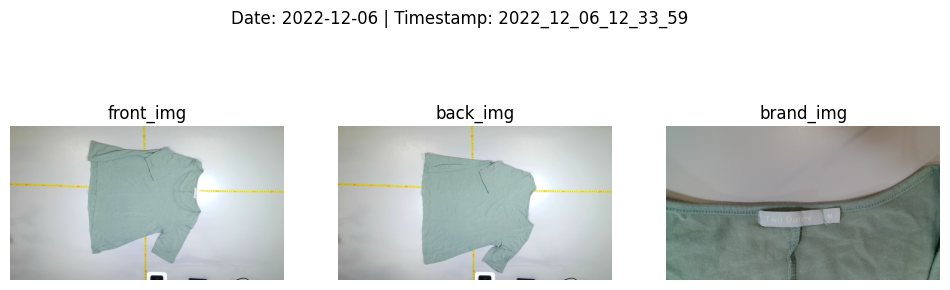

Category:
"Ladies"
Type:
"T-shirt"
size:
"M "
Colors:
[
  "Green"
]
price:
"<50"


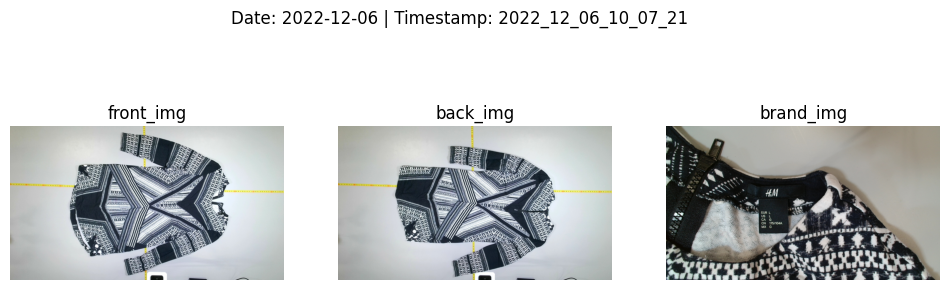

Category:
"Ladies"
Type:
"Dress"
size:
"L"
Colors:
[
  "Black",
  "White"
]
price:
"<50"


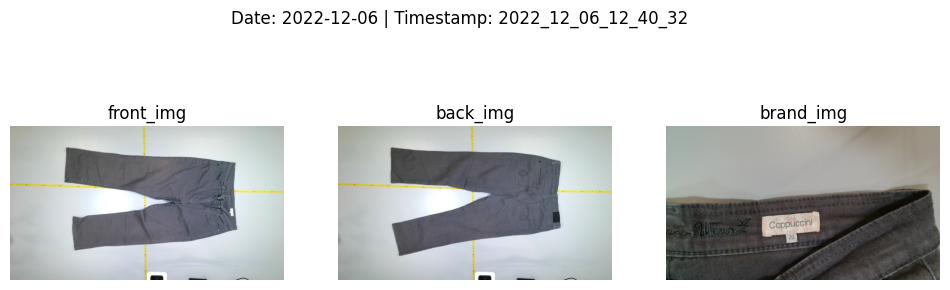

Category:
"Ladies"
Type:
"Trousers"
size:
"M "
Colors:
[
  "Grey"
]
price:
"<50"


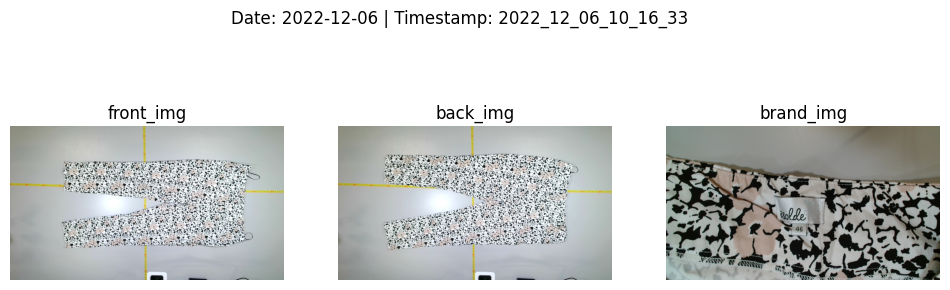

Category:
"Ladies"
Type:
"Trousers"
size:
"46"
Colors:
[
  "White",
  "Black",
  "Pink",
  "Multicolor"
]
price:
"50-100"


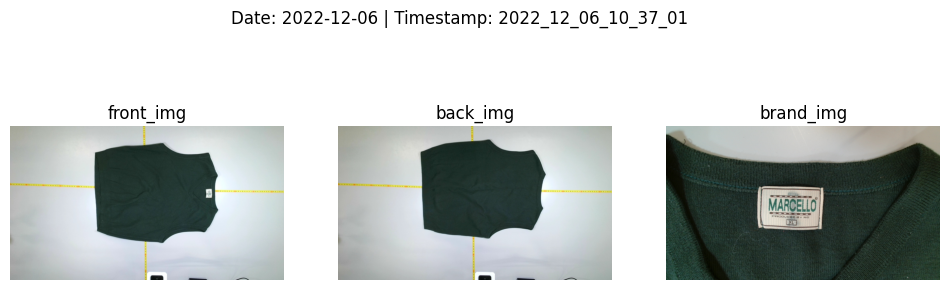

Category:
"Men"
Type:
"Vest"
size:
"XL"
Colors:
[
  "Green"
]
price:
"50-100"


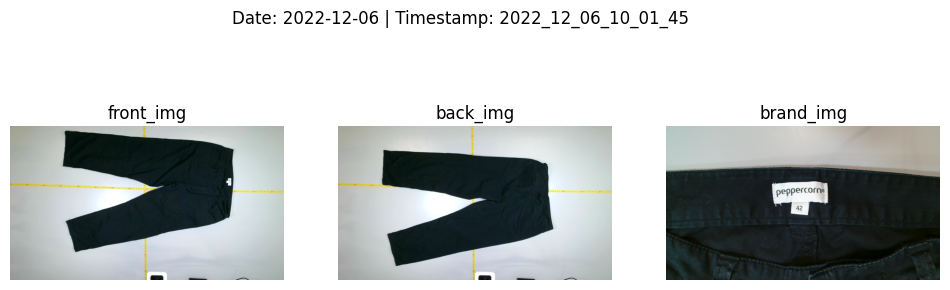

Category:
"Ladies"
Type:
"Jeans"
size:
"42"
Colors:
[
  "Black"
]
price:
"<50"


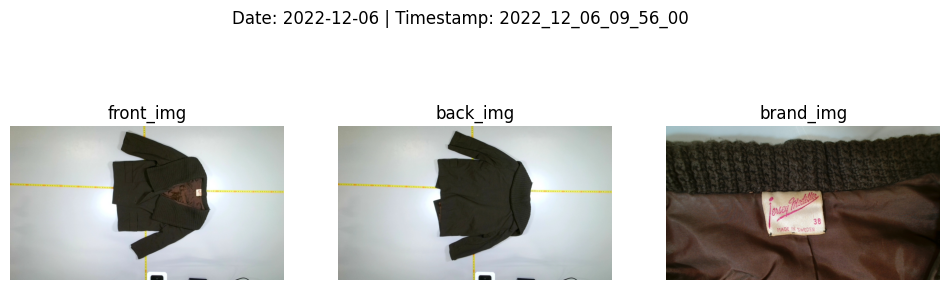

Category:
"Ladies"
Type:
"Blazer"
size:
"38"
Colors:
[
  "Brown"
]
price:
"100-150"


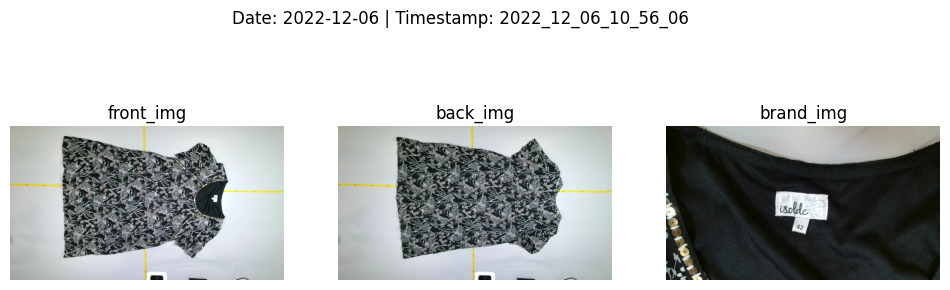

Category:
"Ladies"
Type:
"Dress"
size:
"42"
Colors:
[
  "Black",
  "Beige",
  "Brown",
  "Multicolor"
]
price:
"50-100"


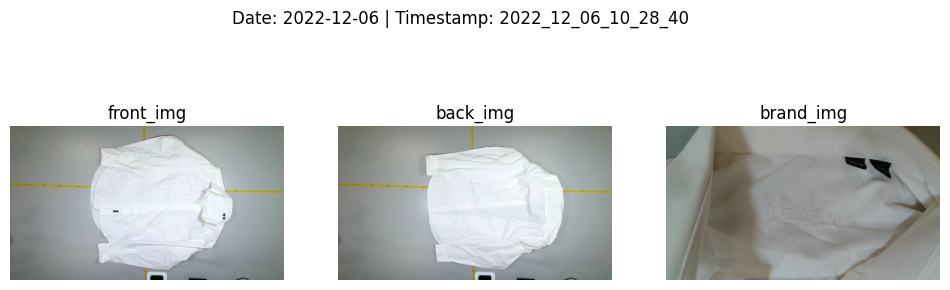

Category:
"Men"
Type:
"Shirt"
size:
"M "
Colors:
[
  "White"
]
price:
"<50"


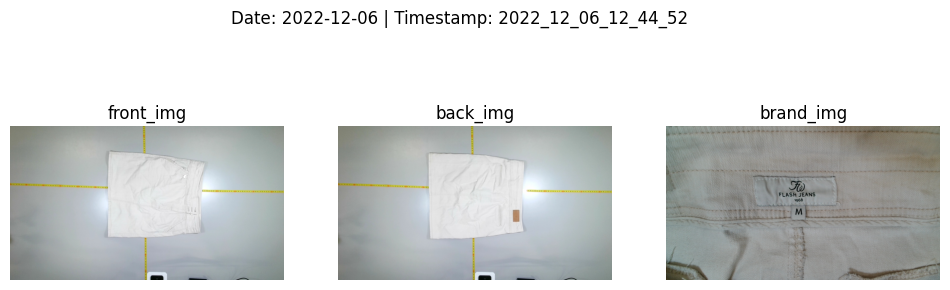

Category:
"Ladies"
Type:
"Skirt"
size:
"M "
Colors:
[
  "Beige"
]
price:
"50-100"


In [159]:
for i in range(10):
  display_sample(df.iloc[i])

###Data value explore

In [160]:
df.isna().sum()

,0
brand,0
brandtext,1171
category,0
type,0
size,0
colors,0
season,0
pilling,0
condition,0
price,0


In [161]:
df = df.drop(['smell','weight','comment','annotator','trend'], axis=1)

In [162]:
def display_unique_values(df, columns=None):
    if columns is None:
        columns = df.columns
    for col in columns:
        unique_vals = df[col].unique()
        print(f"Column: {col}")
        print(f"Unique values ({len(unique_vals)}): {unique_vals}\n")

display_unique_values(df, ['category', 'type','size','season','brand'])

Column: category
Unique values (4): ['Ladies' 'Men' 'Children' 'Unisex']

Column: type
Unique values (32): ['T-shirt' 'Dress' 'Trousers' 'Vest' 'Jeans' 'Blazer' 'Shirt' 'Skirt'
 'Tights' 'Top' 'Sweater' 'Jacket' 'Shorts' 'Winter jacket' 'Blouse'
 'Training top' 'Hoodie' 'Tank top ' 'Cardigan' 'Rain jacket'
 'Winter trousers' 'Pajamas' 'Tunic' 'Rain trousers' 'Robe' 'Night gown'
 'Outerwear' 'sweater' 'Denim jacket' 'Jacker' 'Tank top' 'Nightgown']

Column: size
Unique values (39): ['M ' 'L' '46' 'XL' '42' '38' '40' '36' '140' 'S ' '122' 'None' '110'
 'XXL' '134' '50' '158' '34' '52' 'onesize' '48' '164' '44' '98' '104'
 '146' 'XS' '116' '128' '62' '92' '56' '74' '80' '86' 'XXXL' 'M' 'S'
 'Onesize']

Column: season
Unique values (6): ['Spring' 'All' 'Summer' 'Winter' 'Autumn' 'None']

Column: brand
Unique values (168): ['Not in the list' 'H&M' 'Cappuchini' 'Isolde' 'Batistini (Dressman)'
 'Flash' 'Indiska' 'Lindex' 'Carl William' 'Newbie (Kappahl)' 'Adidas'
 'Free Quent' 'Odd Molly' 'So

#### Cleaning df['brand']



In [163]:
# 1. Clean brand names
def clean_brand_name(brand):
    if pd.isna(brand):
        return 'Unknown'
    brand = brand.strip()
    # แปลงตัวอักษรเป็นรูปแบบมาตรฐาน (lowercase + title case)
    brand_lower = brand.lower()

    # Mapping ชื่อแบรนด์ที่เขียนต่างกันให้อยู่ในชื่อเดียวกัน (ตัวอย่าง)
    brand_corrections = {
        'bershka (zara)': 'Zara',
        'bershka (zara)': 'Zara',
        'pull and bear': 'Zara',
        'pull and bear': 'Zara',
        'massimo dutti': 'Zara',
        'logg (h&m)': 'H&M',
        'weekday': 'H&M',
        'monki': 'H&M',
        'cos': 'H&M',
        'cos': 'H&M',
        'hamton republic (kappahl)': 'Kappahl',
        'newbie (kappahl)': 'Kappahl',
        'xlnt (kappahl)': 'Kappahl',
        'fix (lindex)': 'Lindex',
        'holly and whyte (lindex)': 'Lindex',
        'edc (esprit de corps)': 'Esprit',
        'fbsisters (new yorker)': 'New Yorker',
        'amisu (new yorker)': 'New Yorker',
        'mywear (ica)': 'MyWear',
        'mywear (ica)': 'MyWear',
        'soya/soyaconcept': 'Soya/Soyaconcept',
        'na-kd': 'Na-Kd',
        'na-kd ': 'Na-Kd',
        'new look': 'New Look',
        'new look ': 'New Look',
        'monki ': 'Monki',
        'stokhlm': 'Stockhlm',
        'stockhlm ': 'Stockhlm',
        'stkohlm': 'Stockhlm',
        'soc (stadium)': 'Soc (Stadium)',
        'soc (stadium)': 'Soc (Stadium)',
        'shirt factory': 'Shirt Factory',
        'shirt factory': 'Shirt Factory',
        'mango ': 'Mango',
        'micha ': 'Micha',
        'hollister (abercrombie & fitch)': 'Hollister (Abercomb & Fitch)',
        'frk': 'Frk',
        'craff': 'Craft',
        'free quent': 'Free Quent',
        # เพิ่มเติมตามที่เจอ
    }

    if brand_lower in brand_corrections:
        return brand_corrections[brand_lower]
    else:
        # คืนชื่อแบรนด์แบบ title case (เช่น "Nike", "Adidas")
        return brand.title()

# 2. Clean ทุกแถวก่อน map กลุ่ม
df['brand_clean'] = df['brand'].apply(clean_brand_name)

# 3. สร้าง dict mapping จาก brand_clean → group
brand_groups = {
    'Sportswear & Outdoor': ['Nike', 'Adidas', 'Puma', 'Craft', 'Cross Sportwear', 'Soc (Stadium)', 'Everest', 'Helly Hansen', 'Kari Traa', 'Stormberg', 'Tretorn', 'Hummel', 'McKinley (Intersport)', 'Peak Performance', 'Skill', 'On The Peak'],
    'Fast Fashion & High Street Retailers': ['H&M', 'Zara', 'Bikbok', 'Gina Tricot', 'Only', 'New Look', 'New Yorker', 'Cubus', 'Vero Moda', 'Vila', 'Na-Kd', 'Asos', 'Mango', 'River Island', 'Pieces', 'Forever 21', 'Monki', 'Gap', 'Lindex', 'Kappahl'],
    'Premium & Designer': ['Diesel', "Levi'S", 'Lee', 'Ralph Lauren', 'Gant', 'Nudie Jeans', 'Maison Scotch', 'Filippa K', 'Inwear', 'Second Female', 'Twist & Tango', 'Part Two', 'Carin Wester', 'Jean Paul Gaultier', 'Stenströms', 'Soaked In Luxury', 'Marc O Polo', 'Moschino', 'StyleIn', 'Object', 'Juicy Couture', 'Bondelid', 'Dagmar', 'Tiger Of Sweden', 'J.Lindeberg', 'Hunkydory', 'Hillevi', 'Jack And Jones', 'Cue', 'Esprit', 'Desigual'],
    'Niche Brands': ['Masai', 'Dressman', 'Polarn Och Pyret', 'Deval', 'Indiska', 'Park Lane', 'These Glory Days', 'Odd Molly', 'Carl William', 'Free Quent', 'Soya/Soyaconcept', 'Stockhlm', 'Gudrun Sjödén', 'Swedemount', 'Oscar Of Sweden', 'Me & I', 'Samsö', 'Dobber', 'Micha', 'East West', 'Jackpot', 'Marimekko', 'Kriss', 'Saint Tropez', 'Gerry Weber'],
    'Store Brands': ['365', 'Flash', 'Cappuchini', 'Isolde', 'MyWear', 'Shirt Factory', 'Soul River', 'Etirel', 'Cellbes', 'Melly Moda', 'Lager 157', 'Alice Bizous (Joy)', 'Dorothy Perkins', 'Cream', 'Ellos', 'Prêt', 'Pure Instinct', 'Esmara (Lidl)', 'Name It', 'Miss Milla', 'Mexx', 'Hollister (Abercomb & Fitch)', 'Fransa', 'Frk', 'Oui', 'Rosebud', 'Almia'],
    'Non-Brand': ['Unknown', 'Not Applicable', 'Junkyard', 'Rappson (Gubb)', 'Tutti Frutti', 'Melka (Gammalt Svenskt)?', 'Newbody', 'Havana']
}

brand_to_group_map = {}
for group, brands in brand_groups.items():
    for brand in brands:
        brand_to_group_map[brand] = group

# 4. Map กลุ่มแบรนด์จากชื่อสะอาด
df['brand_group'] = df['brand_clean'].map(brand_to_group_map).fillna('Other Brands')



In [164]:
df = df.drop(['brand','brand_clean'], axis=1)
df['brand_group'].value_counts()

,count
brand_group,
Non-Brand,556
Fast Fashion & High Street Retailers,546
Other Brands,381
Store Brands,172
Niche Brands,120
Premium & Designer,90
Sportswear & Outdoor,47


In [165]:
brand_mapping = {
    "Non-Brand": 0,
    "Fast Fashion & High Street Retailers": 1,
    "Other Brands": 2,
    "Store Brands": 3,
    "Niche Brands": 4,
    "Premium & Designer": 5,
    "Sportswear & Outdoor": 6
}

df['brand_group'] = df['brand_group'].map(brand_mapping)


#### Cleaning df['type']



In [166]:
def simplify_type(df):
    df['type_clean'] = df['type'].str.lower().str.strip()

    corrections = {
        'jacker': 'jacket',
        'night gown': 'nightgown',
        'tank top ': 'tank top',
        'sweater': 'sweater',
    }
    df['type_clean'] = df['type_clean'].replace(corrections)

    type_mapping = {
        'topwear': [
            'blouse', 'shirt', 't-shirt', 'tank top', 'hoodie', 'vest',
            'sweater', 'cardigan', 'top', 'tunic', 'training top'
        ],
        'bottomwear': [
            'trousers', 'shorts', 'jeans', 'tights', 'rain trousers', 'winter trousers'
        ],
        'outerwear': [
            'jacket', 'rain jacket', 'denim jacket', 'winter jacket', 'blazer', 'outerwear'
        ],
        'dresswear': [
            'dress', 'nightgown', 'robe'
        ],
        'sleepwear': [
            'pajamas'
        ]
    }

    reverse_mapping = {}
    for group, types in type_mapping.items():
        for t in types:
            reverse_mapping[t] = group

    df['type_grouped'] = df['type_clean'].map(reverse_mapping).fillna('other')

    return df

df = simplify_type(df)

In [167]:
df = df.drop(['type','type_clean'], axis=1)
df['type_grouped'].value_counts()

,count
type_grouped,
topwear,1451
dresswear,205
bottomwear,130
outerwear,95
other,28
sleepwear,3


In [168]:
type_mapping = {
    "topwear": 0,
    "dresswear": 1,
    "bottomwear": 2,
    "outerwear": 3,
    "other": 4,
    "sleepwear": 5
}

df['type_grouped'] = df['type_grouped'].map(type_mapping)

####Cleaning df['size']

In [169]:
df['size'].value_counts()

,count
size,
None,321
L,286
M,261
S,160
XL,133
M,107
S,90
38,88
40,72


In [170]:
def simplify_size(df):
    df['size_clean'] = df['size'].astype(str).str.strip().str.lower()

    # Mapping dictionary
    size_mapping = {
        'xs': ['34', '36', 'xs'],
        's': ['38', '40', 's'],
        'm': ['42', '44', 'm'],
        'l': ['46', '48', 'l'],
        'xl': ['50', '52', 'xl'],
        'xxl': ['54', '56', 'xxl', 'xxxl'],
        'onesize': ['onesize', 'one size', 'onesize'],
        'kids': ['74', '80', '86', '92', '98', '104', '110', '116', '122',
                 '128', '134', '140', '146', '158', '164'],
        'unknown': ['none', 'nan', '']
    }

    def map_size(value):
        for group, values in size_mapping.items():
            if value in values:
                return group
        return 'unknown'

    df['size_clean'] = df['size_clean'].apply(map_size)
    return df

df = simplify_size(df)

In [171]:
df = df.drop(['size'], axis=1)
df['size_clean'].value_counts()

,count
size_clean,
m,476
s,410
l,327
unknown,324
xl,140
xs,139
kids,48
xxl,44
onesize,4


In [172]:
size_mapping = {
    "unknown": 0,
    "xs": 1,
    "s": 2,
    "m": 3,
    "l": 4,
    "xl": 5,
    "xxl": 6,
    "kids": 7,
    "onesize": 8
}

df["size_clean"] = df["size_clean"].map(size_mapping)

#### Pilling

In [173]:
display_unique_values(df, ['pilling','condition','price','pattern'])

Column: pilling
Unique values (5): [3 5 4 2 1]

Column: condition
Unique values (5): [2 1 5 4 3]

Column: price
Unique values (6): ['<50' '50-100' '100-150' '>400' '150-250' '250-400']

Column: pattern
Unique values (15): ['None' 'Geometric print' 'Floral print' 'Glitter' 'Striped' 'Transparent'
 'Other' 'Lace' 'Checkered print' 'Logo print' 'Dots' 'Embroidered'
 'Animal print' 'Metallic' 'Plain']



In [174]:
df['pilling'].value_counts()

,count
pilling,
5,989
4,534
3,286
2,75
1,28


####Cleaning df['cut']

In [175]:
df['cut'] = df['cut'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# รวม list ทั้งหมดเป็น list เดียว
all_cuts = df['cut'].explode()

# ดู unique values
unique_cuts = all_cuts.dropna().unique()
print(unique_cuts)

['C-collar' 'Loose' 'Regular' 'Cropped' 'V-collar' 'Tight' 'Turtle neck'
 'Long' 'Tight, Turtle neck' 'None' 'Oversize' 'v-collar' 'Collar'
 'Tight, V-collar' 'c-collar']


In [176]:
# Your fixed vocabulary
CUT_CATEGORIES = ['collar', 'v-collar', 'tight', 'loose', 'regular', 'turtle-neck', 'cropped', 'long']

def clean_cut(cut_list):
    # Handle both list and string inputs
    if isinstance(cut_list, str):
        try:
            cut_list = eval(cut_list) if cut_list.startswith("[") else cut_list.split(',')
        except:
            cut_list = [cut_list]

    cut_list = [c.strip().lower() for c in cut_list if c]

    # Mapping typos/variants to standard
    mapping = {
        'c-collar': 'collar',
        'c collar': 'collar',
        'collar': 'collar',
        'v-collar': 'v-collar',
        'v collar': 'v-collar',
        'tight': 'tight',
        'loose': 'loose',
        'oversize': 'loose',  # treat oversize as loose
        'regular': 'regular',
        'turtle neck': 'turtle-neck',
        'turtleneck': 'turtle-neck',
        'cropped': 'cropped',
        'long': 'long'
    }

    cleaned = set()
    for item in cut_list:
        key = item.strip().lower()
        cleaned.add(mapping.get(key, key))

    # Keep only terms in vocabulary
    return [c for c in cleaned if c in CUT_CATEGORIES]

# Apply cleaning
df['cut_cleaned'] = df['cut'].apply(clean_cut)

# Multi-hot encode
def cuts_to_multihot(cuts):
    return [1 if cat in cuts else 0 for cat in CUT_CATEGORIES]

df['cut_multihot'] = df['cut_cleaned'].apply(cuts_to_multihot)

# Example
print(df[['cut', 'cut_cleaned', 'cut_multihot']].head())


                   cut          cut_cleaned              cut_multihot
0    [C-collar, Loose]      [collar, loose]  [1, 0, 0, 1, 0, 0, 0, 0]
1  [Regular, C-collar]    [collar, regular]  [1, 0, 0, 0, 1, 0, 0, 0]
2            [Cropped]            [cropped]  [0, 0, 0, 0, 0, 0, 1, 0]
3            [Regular]            [regular]  [0, 0, 0, 0, 1, 0, 0, 0]
4  [Regular, V-collar]  [v-collar, regular]  [0, 1, 0, 0, 1, 0, 0, 0]


In [177]:
df = df.drop(['cut'], axis=1)
df['cut_cleaned'].value_counts()

,count
cut_cleaned,
"[collar, regular]",654
[regular],316
"[v-collar, regular]",247
[collar],141
[loose],68
[],60
"[collar, loose]",59
[v-collar],47
"[collar, long]",38


In [178]:
df['cut_multihot'].value_counts()

,count
cut_multihot,
"[1, 0, 0, 0, 1, 0, 0, 0]",654
"[0, 0, 0, 0, 1, 0, 0, 0]",316
"[0, 1, 0, 0, 1, 0, 0, 0]",247
"[1, 0, 0, 0, 0, 0, 0, 0]",141
"[0, 0, 0, 1, 0, 0, 0, 0]",68
"[0, 0, 0, 0, 0, 0, 0, 0]",60
"[1, 0, 0, 1, 0, 0, 0, 0]",59
"[0, 1, 0, 0, 0, 0, 0, 0]",47
"[0, 0, 0, 0, 1, 1, 0, 0]",42


#### Pattern

In [179]:
display_unique_values(df, ['pattern'])

Column: pattern
Unique values (15): ['None' 'Geometric print' 'Floral print' 'Glitter' 'Striped' 'Transparent'
 'Other' 'Lace' 'Checkered print' 'Logo print' 'Dots' 'Embroidered'
 'Animal print' 'Metallic' 'Plain']



In [180]:
df['pattern'].value_counts()

,count
pattern,
Plain,568
None,501
Floral print,218
Striped,145
Logo print,118
Lace,86
Geometric print,70
Animal print,49
Other,45


In [181]:
pattern_group_map = {
    'Plain': 'Solid',
    'None': 'Solid',
    'Floral print': 'Printed',
    'Striped': 'Printed',
    'Logo print': 'Printed',
    'Geometric print': 'Printed',
    'Animal print': 'Printed',
    'Dots': 'Printed',
    'Checkered print': 'Printed',
    'Lace': 'Texture_Embellishment',
    'Glitter': 'Texture_Embellishment',
    'Embroidered': 'Texture_Embellishment',
    'Metallic': 'Texture_Embellishment',
    'Transparent': 'Texture_Embellishment',
    'Other': 'Other'
}

df['pattern'] = df['pattern'].map(pattern_group_map)
df['pattern'].value_counts()

,count
pattern,
Solid,1069
Printed,668
Texture_Embellishment,130
Other,45


In [182]:
pattern_mapping = {
    "Solid": 0,
    "Printed": 1,
    "Texture_Embellishment": 2,
    "Other": 3
}

df["pattern"] = df["pattern"].map(pattern_mapping)


#### stain

In [183]:
df['stains'].value_counts()

,count
stains,
No,769
Yes,402
None,390
Minor,224
Major,127


In [184]:
def map_stain_level(stain):
    if stain in ['No', 'None']:
        return 'No'
    elif stain == 'Yes':
        return 'Yes'
    elif stain == 'Minor':
        return 'Minor Stain'
    elif stain == 'Major':
        return 'Major Stain'
    else:
        return 'Unknown'

df['stains'] = df['stains'].apply(map_stain_level)
df['stains'].value_counts()

,count
stains,
No,1159
Yes,402
Minor Stain,224
Major Stain,127


In [185]:
df["stains"] = df["stains"].apply(lambda x: "No" if x == "No" else "Yes")
stains_mapping = {
    "No": 0,
    "Yes": 1,
}

df["stains"] = df["stains"].map(stains_mapping)

####damage

In [186]:
df['damage'].value_counts()

,count
damage,
,1688
1,50
2,13
0,11
Washed out,10
...,...
2 damages,1
"sweat stains, croocked",1
sweat stain,1


In [187]:
display_unique_values(df, ['damage'])

Column: damage
Unique values (83): ['' 'Sunbleeched' 'Pulled threads' 'Contracted' 'Washed out' 'S'
 'Loose thread' '1' '2' '54' 'Broken logo ' 'Bad seams, washed out'
 'Missing button' 'Broken seams' 'Crooked' 'Washed out seams'
 'Pulled thread' 'Loose button' 'Washed out, minor stain '
 'Pulled threads, sweat stains' 'stain' 'knee stretched' 'collar '
 'Bubbly zipper' '5' 'rhinestones missing' 'a little washed out' '3'
 'Several stains' 'pulled thread' 'pulled threads' '19'
 'Washed out and several stains' 'Elastic band is damaged'
 'straps have been worn out and stretched'
 'washed out color and pressure damage on the fibers'
 'Threads have been pulled and textilefibers have been damaged'
 '1 pulled thread' 'ripped armpit seams'
 'colorfading and wear of textile fibers' 'Holes in seams' '6'
 'Crooked, washed out' 'Washed out, crooked' 'Crooked, pulled thread'
 'Crooked, fuzzy' 'Washed out, sweat stains' 'Pulled threads, bad seams'
 'Paint stains' '7' '12' 'Pulled threads, broken sea

In [188]:
def extract_damage_count(text):
    if not text or text.strip() == '':
        return 0
    match = re.search(r'(\d+)', text)
    if match:
        return int(match.group(1))
    damage_keywords = ['broken', 'pulled', 'hole', 'damage', 'seam', 'stain', 'ripped', 'missing', 'loose', 'washed out', 'faded', 'crooked', 'bubbly', 'paint']
    text_lower = text.lower()
    if any(keyword in text_lower for keyword in damage_keywords):
        return 1
    return 0

def categorize_damage_severity(text):
    count = extract_damage_count(text)
    if count == 0:
        return 'No Damage'
    elif count <= 2:
        return 'Minor Damage'
    elif count <= 5:
        return 'Moderate Damage'
    else:
        return 'Severe Damage'

df['damage_count'] = df['damage'].apply(extract_damage_count)
df['damage_severity'] = df['damage'].apply(categorize_damage_severity)


In [189]:
df = df.drop(['damage'], axis=1)
df['damage_count'].value_counts()

,count
damage_count,
0,1706
1,151
2,23
3,12
5,9
8,2
6,2
4,2
54,1


In [190]:
df['damage_severity'].value_counts()

,count
damage_severity,
No Damage,1706
Minor Damage,174
Moderate Damage,23
Severe Damage,9


In [191]:
damage_mapping = {
    "No Damage": 0,
    "Minor Damage": 1,
    "Moderate Damage": 2,
    "Severe Damage": 3
}

# แปลงค่าเป็นตัวเลข
df['damage_severity'] = df['damage_severity'].map(damage_mapping)

####material

In [192]:
df['material'].value_counts()

,count
material,
100%cotton,347
100%polyester,190
100%viscose,106
100% cotton,82
100% Cott,63
...,...
"55% lyocell,45% viscose",1
"50% rayon, 50% acrylic",1
95%polyamide 5%elastane,1


In [193]:
display_unique_values(df, ['material'])

Column: material
Unique values (524): ['65% Bamboo, 30% cotton, 5% elastane' '100% cotton'
 '98% cotton, 2% elastane' '74% rayon, 22% nylon, 4% spandex'
 '50% cotton, 50% acrylic' '74% wool, 26% acrylic' '100% viscose'
 '80% cotton, 18% polyester, 2% elastane' '95% polyester, 5% spandex'
 '75% viscose,25% lurex' '80% merino wool, 20% polyamide'
 '50% cotton, 50% modal' '77% wool, 23% acrylic' '80% cotton, 20% acrylic'
 '65% Polyester, 35% cotton' '53% polyester, 47% nylon' '100%cotton'
 '100%polyester' '100%Cotton' '65%cotton 35%polyester'
 '50%cotton 50%viscose' '100%viscose' '92%polyester 8%elastane'
 '65%polyester 35%cotton' '95%cotton 5%elastane' '60%cotton 40%polyester'
 '100%wool' '69%polyester 20%rayon 2%spandex' '73%cotton 27%polyester'
 '85%cotton 15%polyester' '70%cotton 30%polyester'
 '54%polyester 32%cotton 14%nylon' '94%cotton 5%polyester 1%elastane'
 '95%polyester 5%spandex' '96%cotton 4%elastane' '95%polyester 5%elastane'
 '62%acrylic 28%polyamide 8%wool 2%elastane' '98%

แก้คำผิด

In [194]:
df['material_clean'] = df['material'].str.lower().str.strip()
df['material_clean'] = df['material_clean'].str.replace(r'[\u00a0]', '', regex=True)  # ลบ non-breaking space
df['material_clean'] = df['material_clean'].str.replace(r'\s+', ' ', regex=True)

# แก้คำผิด
corrections = {

    "cotton": [
        "cotton",
        "cott",
        "cott?",
        "cott ",
        "cotton ",
        "cott ",
        "bomull",
        "bomull ",
        "Cott",
        "cotton",
        "Cott ",
        "cotton?",
        "cott?",
        "cotton ",
        "cott ",
        "cotton\u00a0",
        "cotton\u00a0",
        "cott ",
        "cott\u00a0",
        "cott\u00a0"
    ],
    "polyester": [
        "polyester",
        "poly",
        "polyest",
        "polyest?",
        "polyeste",
        "polyeste ",
        "polyest?",
        "polyester ",
        "poly",
        "poly ",
        "polyamide",
        "polyamid",
        "poly?",
        "poly ",
        "polyester\u00a0",
        "polyester\u00a0",
        "polyester\u00a0",
        "polyester\u00a0",
        "poly?",
        "poly\u00a0",
        "poly\u00a0",
        "polyamide",
        "polyamide ",
        "poly "
    ],
    "nylon": [
        "nylon",
        "nylonn",
        "nylone",
        "nylone ",
        "nylon ",
        "nylo",
        "nylo ",
        "nylo",
        "nylon",
        "nylon?",
        "nylo",
        "nylone",
        "nylone ",
        "nylone?"
    ],
    "viscose": [
        "viscose",
        "viscoseose",
        "viscose ",
        "viscos",
        "viskos",
        "viskose",
        "viscosa",
        "visc",
        "viscose",
        "viscose?",
        "visc",
        "visc?",
        "viscose ",
        "visc ",
        "viscosa",
        "viscosa ",
        "viskose",
        "viskos ",
        "viscosa?",
        "viscosa?",
        "visc"
    ],
    "acrylic": [
        "acrylic",
        "acry",
        "acrylic ",
        "acryl",
        "acry ",
        "acry ",
        "acrylic",
        "acry",
        "acry?",
        "acry ",
        "acrylic ",
        "acryl",
        "acrylic?",
        "acrylic\u00a0",
        "acryl\u00a0",
        "acry\u00a0",
        "acry\u00a0"
    ],
    "wool": [
        "wool",
        "wool ",
        "wool?",
        "wool  ",
        "wool",
        "wool ",
        "wool?",
        "wool?",
        "wool?",
        "wool?",
        "wool\u00a0",
        "wool\u00a0"
    ],
    "elastane": [
        "elastane",
        "elastan",
        "elastane ",
        "elastan ",
        "elastane?",
        "elastan?",
        "elastano",
        "elastano ",
        "elastan",
        "elstan",
        "elstane",
        "elastane",
        "elastan ",
        "elstane ",
        "elastane?",
        "elstan?",
        "elstane?",
        "elastan",
        "elastane ",
        "elstane?",
        "elstan ",
        "elastane?",
        "elastane?",
        "elastane\u00a0",
        "elastan\u00a0",
        "elastan\u00a0"
    ],
    "rayon": [
        "rayon",
        "rayon ",
        "rayon?",
        "rayon",
        "rayon?",
        "rayon?"
    ],
    "modal": [
        "modal",
        "modal ",
        "modal?",
        "modal",
        "modal ",
        "modal?",
        "modal?"
    ],
    "silk": [
        "silk",
        "silk ",
        "silk?",
        "silk",
        "silk ",
        "silk?",
        "silk?",
        "silk?"
    ],
    "linen": [
        "linen",
        "linne",
        "linnen",
        "linnen ",
        "linen ",
        "lin",
        "linne",
        "linne ",
        "linnen",
        "linnen ",
        "lin ",
        "linn ",
        "linn?",
        "lin "
    ],
    "spandex": [
        "spandex",
        "spandex ",
        "spandex?",
        "spandex",
        "spandex ",
        "spandex?",
        "spandex?",
        "spandex\u00a0"
    ],
    "lycra": [
        "lycra",
        "lycra ",
        "lycra?",
        "lycra",
        "lycra ",
        "lycra?",
        "lycr",
        "lycra?"
    ],
    "bamboo": [
        "bamboo",
        "bamboo ",
        "bamboo?",
        "bamboo",
        "bamboo ",
        "bamboo?"
    ],
    "alpaca": [
        "alpaca",
        "alpaca ",
        "alpaca?",
        "alpaca",
        "alpaca?",
        "alpaca?"
    ],
    "lyocell": [
        "lyocell",
        "lyocell ",
        "lyocell?",
        "lyocell",
        "lyocell ",
        "lyocell?",
        "lyocell\u00a0",
        "lyocell\u00a0"
    ],
    "lurex": [
        "lurex",
        "lurex ",
        "lurex?",
        "lurex",
        "lurex?",
        "lurex?"
    ],
    "mohair": [
        "mohair",
        "mohair ",
        "mohair?",
        "mohair",
        "mohair?",
        "mohair?"
    ],
    "angora": [
        "angora",
        "angora ",
        "angora?",
        "angora",
        "angora?",
        "angora?"
    ],
    "cashmere": [
        "cashmere",
        "cashmere ",
        "cashmere?",
        "cashmere",
        "cashmere?",
        "cashmere?"
    ],
    "suede": [
        "suede",
        "suede ",
        "suede?",
        "suede",
        "suede?",
        "suede?"
    ],
    "tencel": [
        "tencel",
        "tencel ",
        "tencel?",
        "tencel",
        "tencel?",
        "tencel?"
    ],
    "hemp": [
        "hemp",
        "hemp ",
        "hemp?",
        "hemp",
        "hemp?",
        "hemp?"
    ]
}

# ใช้ regex word boundary เพื่อแก้คำผิดให้แม่นยำ
def correct_typo_regex(text):
    if not isinstance(text, str):
        return text
    for correct_word, typo_list in corrections.items():
        for typo in typo_list:
            # สร้าง pattern ให้ match คำเต็ม ๆ เท่านั้น
            pattern = r'\b' + re.escape(typo.strip()) + r'\b'
            text = re.sub(pattern, correct_word, text)
    return text

# ใช้แก้คำผิดทีเดียวหลังทำความสะอาด
df['material_clean'] = df['material_clean'].apply(correct_typo_regex)



Parsing composition
{material: percent}

In [195]:
def parse_material(text):
    if pd.isna(text) or text in ['not available', 'unknown', '', 'scanner can not read material.']:
        return {}
    components = re.findall(r'(\d+)%\s*([a-z]+)', text)
    return {mat: int(pct) for pct, mat in components}

# Apply to the correct column name
df['material_dict'] = df['material_clean'].apply(parse_material)

MATERIAL_CATEGORIES = [
    'cotton', 'polyester', 'viscose', 'acrylic', 'nylon',
    'elastane', 'wool', 'rayon', 'silk', 'linen', 'spandex',
    'lycra', 'bamboo', 'alpaca', 'lyocell', 'cashmere'
]

def material_to_vector(mat_dict):
    return [mat_dict.get(cat, 0) for cat in MATERIAL_CATEGORIES]

# Use 'material_dict' instead of 'material_cleaned'
df['material_vector'] = df['material_dict'].apply(material_to_vector)

In [196]:
df = df.drop(['material','material_clean'], axis=1)
df['material_dict'].value_counts()

,count
material_dict,
{'cotton': 100},535
{'polyester': 100},310
{'viscose': 100},200
{'acrylic': 100},51
"{'cotton': 95, 'elastane': 5}",44
...,...
"{'viscose': 52, 'polyester': 21}",1
"{'viscose': 56, 'nylon': 44}",1
"{'lyocell': 68, 'modal': 32}",1


In [197]:
df['material_vector'].value_counts()

,count
material_vector,
"[100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",535
"[0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",310
"[0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",200
"[0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",51
"[95, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",44
...,...
"[81, 0, 0, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1
"[0, 69, 0, 0, 0, 0, 31, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1
"[0, 0, 0, 0, 45, 0, 10, 42, 0, 0, 0, 0, 0, 0, 0, 3]",1


####usage

In [198]:
df['usage'].value_counts()

,count
usage,
Export,1071
Reuse,641
Recycle,135
Repair,63
export,1
reuse,1


In [199]:
# สมมติคอลัมน์ชื่อ 'usage'
df['usage_clean'] = df['usage'].str.lower().str.strip()

# นับความถี่ใหม่
usage_counts = df['usage_clean'].value_counts()

df = df.drop(['usage'], axis=1)
print(usage_counts)


usage_clean
export     1072
reuse       642
recycle     135
repair       63
Name: count, dtype: int64


In [200]:
usage_mapping = {
    "export": 0,
    "reuse": 1,
    "recycle": 2,
    "repair": 3
}
df['usage_clean'] = df['usage_clean'].map(usage_mapping)

#### hole

In [201]:
df['holes'].value_counts()
df['holes'].fillna("None", inplace=True)

/tmp/ipython-input-2834388920.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['holes'].fillna("None", inplace=True)


In [202]:
df['holes'].value_counts()

,count
holes,
None,1855
Minor,39
Major,18


In [203]:
holes_mapping = {
    "None": 0,
    "Minor": 1,
    "Major": 2
}
df['holes'] = df['holes'].map(holes_mapping)

#### Color

In [204]:
df['main_color'] = df['colors'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
df['main_color'] = df['main_color'].astype(str).str.strip().str.lower()

df['main_color'].value_counts()

,count
main_color,
black,375
white,332
blue,242
multicolor,224
pink,176
grey,113
beige,109
red,99
green,83


In [205]:
color_mapping = {
    'black': 0, 'white': 1, 'blue': 2, 'multicolor': 3, 'pink': 4,
    'grey': 5, 'beige': 6, 'red': 7, 'green': 8, 'purple': 9,
    'brown': 10, 'yellow': 11, 'orange': 12, 'turquoise': 13, 'none': 14
}

df['main_color'] = df['main_color'].map(color_mapping)


In [206]:
df.columns

Index(['brandtext', 'category', 'colors', 'season', 'pilling', 'condition',
       'price', 'pattern', 'stains', 'holes', 'front_img', 'back_img',
       'brand_img', 'timestamp', 'day', 'brand_group', 'type_grouped',
       'size_clean', 'cut_cleaned', 'cut_multihot', 'damage_count',
       'damage_severity', 'material_dict', 'material_vector', 'usage_clean',
       'main_color'],
      dtype='object')

In [207]:
df.drop(['brandtext','colors','cut_cleaned','brand_img',] , axis=1, inplace=True)

In [208]:
df['price'].value_counts(0)

,count
price,
<50,1145
50-100,617
100-150,136
150-250,10
>400,2
250-400,2


####category & season

In [209]:
df['season'].value_counts()

,count
season,
All,1203
Summer,295
Spring,151
Autumn,125
None,103
Winter,35


In [210]:
season_mapping = {
    'All': 0,
    'Summer': 1,
    'Spring': 2,
    'Autumn': 3,
    'None': 4,
    'Winter': 5
}

df['season'] = df['season'].map(season_mapping)


In [211]:
df['category'].value_counts()

,count
category,
Ladies,1727
Men,117
Children,56
Unisex,12


In [212]:
category_mapping = {
    "Ladies": 0,
    "Men": 1,
    "Children": 2,
    "Unisex": 3
}

df['category'] = df['category'].map(category_mapping)


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1912 entries, 0 to 848
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         1912 non-null   int64 
 1   season           1912 non-null   int64 
 2   pilling          1912 non-null   int64 
 3   condition        1912 non-null   int64 
 4   price            1912 non-null   object
 5   pattern          1912 non-null   int64 
 6   stains           1912 non-null   int64 
 7   holes            1912 non-null   int64 
 8   front_img        1912 non-null   object
 9   back_img         1912 non-null   object
 10  timestamp        1912 non-null   object
 11  day              1912 non-null   object
 12  brand_group      1912 non-null   int64 
 13  type_grouped     1912 non-null   int64 
 14  size_clean       1912 non-null   int64 
 15  cut_multihot     1912 non-null   object
 16  damage_count     1912 non-null   int64 
 17  damage_severity  1912 non-null   int64 

## Prepare dataset for CNN


In [214]:
df.head(30)

,category,season,pilling,condition,price,pattern,stains,holes,front_img,back_img,...,brand_group,type_grouped,size_clean,cut_multihot,damage_count,damage_severity,material_dict,material_vector,usage_clean,main_color
0,0,2,3,2,<50,0,0,0,/content/dec2022/2022-12-06/front_2022_12_06_1...,/content/dec2022/2022-12-06/back_2022_12_06_12...,...,2,0,3,"[1, 0, 0, 1, 0, 0, 0, 0]",0,0,"{'bamboo': 65, 'cotton': 30, 'elastane': 5}","[30, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 65, 0, 0...",3,8
1,0,0,3,2,<50,1,0,0,/content/dec2022/2022-12-06/front_2022_12_06_1...,/content/dec2022/2022-12-06/back_2022_12_06_10...,...,1,1,4,"[1, 0, 0, 0, 1, 0, 0, 0]",0,0,{'cotton': 100},"[100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",2,0
2,0,0,5,1,<50,0,1,0,/content/dec2022/2022-12-06/front_2022_12_06_1...,/content/dec2022/2022-12-06/back_2022_12_06_12...,...,3,2,3,"[0, 0, 0, 0, 0, 0, 1, 0]",0,0,"{'cotton': 98, 'elastane': 2}","[98, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,5
3,0,1,5,5,50-100,1,0,0,/content/dec2022/2022-12-06/front_2022_12_06_1...,/content/dec2022/2022-12-06/back_2022_12_06_10...,...,3,2,4,"[0, 0, 0, 0, 1, 0, 0, 0]",0,0,"{'rayon': 74, 'nylon': 22, 'spandex': 4}","[0, 0, 0, 0, 22, 0, 0, 74, 0, 0, 4, 0, 0, 0, 0...",1,1
4,1,0,3,2,50-100,0,0,0,/content/dec2022/2022-12-06/front_2022_12_06_1...,/content/dec2022/2022-12-06/back_2022_12_06_10...,...,2,0,5,"[0, 1, 0, 0, 1, 0, 0, 0]",0,0,"{'cotton': 50, 'acrylic': 50}","[50, 0, 0, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",3,8
5,0,0,5,2,<50,0,1,0,/content/dec2022/2022-12-06/front_2022_12_06_1...,/content/dec2022/2022-12-06/back_2022_12_06_10...,...,2,2,3,"[0, 0, 0, 0, 1, 0, 0, 0]",1,1,"{'cotton': 98, 'elastane': 2}","[98, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0
6,0,0,5,4,100-150,0,0,0,/content/dec2022/2022-12-06/front_2022_12_06_0...,/content/dec2022/2022-12-06/back_2022_12_06_09...,...,2,3,2,"[0, 1, 0, 0, 0, 0, 1, 0]",1,1,"{'wool': 74, 'acrylic': 26}","[0, 0, 0, 26, 0, 0, 74, 0, 0, 0, 0, 0, 0, 0, 0...",1,10
7,0,0,5,4,50-100,1,1,0,/content/dec2022/2022-12-06/front_2022_12_06_1...,/content/dec2022/2022-12-06/back_2022_12_06_10...,...,3,1,3,"[1, 0, 0, 1, 0, 0, 0, 0]",0,0,{'viscose': 100},"[0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1,0
8,1,0,5,1,<50,0,1,0,/content/dec2022/2022-12-06/front_2022_12_06_1...,/content/dec2022/2022-12-06/back_2022_12_06_10...,...,2,0,3,"[0, 0, 0, 0, 1, 0, 0, 0]",0,0,{'cotton': 100},"[100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",2,1
9,0,2,5,5,50-100,0,0,0,/content/dec2022/2022-12-06/front_2022_12_06_1...,/content/dec2022/2022-12-06/back_2022_12_06_12...,...,3,4,3,"[0, 0, 0, 0, 0, 0, 1, 0]",0,0,"{'cotton': 80, 'polyester': 18, 'elastane': 2}","[80, 18, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1,6


In [220]:
df.columns

Index(['category', 'season', 'pilling', 'condition', 'price', 'pattern',
       'stains', 'holes', 'front_img', 'back_img', 'timestamp', 'day',
       'cut_multihot', 'damage_count', 'damage_severity', 'material_dict',
       'material_vector', 'main_color', 'brand', 'type', 'size', 'usage'],
      dtype='object')

In [216]:
df.head()

,category,season,pilling,condition,price,pattern,stains,holes,front_img,back_img,...,brand_group,type_grouped,size_clean,cut_multihot,damage_count,damage_severity,material_dict,material_vector,usage_clean,main_color
0,0,2,3,2,<50,0,0,0,/content/dec2022/2022-12-06/front_2022_12_06_1...,/content/dec2022/2022-12-06/back_2022_12_06_12...,...,2,0,3,"[1, 0, 0, 1, 0, 0, 0, 0]",0,0,"{'bamboo': 65, 'cotton': 30, 'elastane': 5}","[30, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 65, 0, 0...",3,8
1,0,0,3,2,<50,1,0,0,/content/dec2022/2022-12-06/front_2022_12_06_1...,/content/dec2022/2022-12-06/back_2022_12_06_10...,...,1,1,4,"[1, 0, 0, 0, 1, 0, 0, 0]",0,0,{'cotton': 100},"[100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",2,0
2,0,0,5,1,<50,0,1,0,/content/dec2022/2022-12-06/front_2022_12_06_1...,/content/dec2022/2022-12-06/back_2022_12_06_12...,...,3,2,3,"[0, 0, 0, 0, 0, 0, 1, 0]",0,0,"{'cotton': 98, 'elastane': 2}","[98, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,5
3,0,1,5,5,50-100,1,0,0,/content/dec2022/2022-12-06/front_2022_12_06_1...,/content/dec2022/2022-12-06/back_2022_12_06_10...,...,3,2,4,"[0, 0, 0, 0, 1, 0, 0, 0]",0,0,"{'rayon': 74, 'nylon': 22, 'spandex': 4}","[0, 0, 0, 0, 22, 0, 0, 74, 0, 0, 4, 0, 0, 0, 0...",1,1
4,1,0,3,2,50-100,0,0,0,/content/dec2022/2022-12-06/front_2022_12_06_1...,/content/dec2022/2022-12-06/back_2022_12_06_10...,...,2,0,5,"[0, 1, 0, 0, 1, 0, 0, 0]",0,0,"{'cotton': 50, 'acrylic': 50}","[50, 0, 0, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",3,8


In [219]:
df['brand'] = df['brand_group']
df.drop(['brand_group'], axis=1, inplace=True)

df['type'] = df['type_grouped']
df.drop(['type_grouped'], axis=1, inplace=True)

df['size'] = df['size_clean']
df.drop(['size_clean'], axis=1, inplace=True)

df['usage'] = df['usage_clean']
df.drop(['usage_clean'], axis=1, inplace=True)


In [221]:
df.to_csv('cloths_dataframe.csv', index=False)